## Time series models

###### Additive

$$ Y^A_t = T_t + C_t + S_t + I_t $$

##### Multiplicative

$$ Y^M_t = T_t \times C_t \times S_t \times I_t $$

Time series can be made up of a number of components which combine additively or multiplicative

The components are:
- __Trend__ - $T_t$: any long term increase or drease in the data
- __Seasonal__ - $S_t$:fixed periodic patterns usually relating to times of day, week, year etc.
- __Cyclic__ - $C_t$: occurs when data shows rises and falls that are repeated but __not__ of a __fixed__ frequency. Examples include business cycles which will not have fixed periods. Often used for cycles longer than yearly, however I wonder if it is possible to use for short term cycles such as soiling
- __Irregular__ - $I_t$: Noise or residual left in signal

### Powerput from PV plants
The power output from PV plants is muliplicative in nature the trend is of the form:

$$Y_t = P_t(1 + \frac{(rt)}{365})$$

where $P_t$ is the irradiance, $r$ is the degradation rate (assumed to be negative) and $t$ is in units of days.

So our trend of interest is 

$$T_t  =  \left(1 + \frac{(rt)}{365}\right)$$

$P_t$ can be affected by weather, soiling and time of day/year. In decomposition methods we should be able to remove these factors.

For now I think we should assume that the degragtion rate is constant between for an entire time series.

A degradation rate of 0.1% corresponds to an r of -0.1/100. 

__Goal__: my initial goal isto achieve a RMSE error of 0.01% for the rate for each data set. 

$$RMSE in per cent = 100*\sqrt{(r_{true} - r_{calculated})^2}$$


Many methods for time series decomposition are  more suited to dealing with additive models

We can convert our multiplicative model to an additive model by using logarithms.

$$ y_t = log\left(Y^M_t\right) $$
$$ y_t = log\left( T_t \times C_t \times S_t \times I_t\right) $$
$$ y_t = log\left(T_t \right) + log\left(C_t\right) + log\left(S_t\right) + log\left(I_t\right) $$

If we consider the form of our trend we see that:
$$log\left(T_t\left) = log\left(1 + \frac{(rt)}{365}\right) $$



### Unobserved Components

Assuming a time series can be broken into an number of additive effects; Trends, Seasons, Cycles and Regerssion effects

The model looks like:

$$y_t = \underbrace{u_t}_{\text{trend}} + \underbrace{\lambda_t}_{\text{seasonal}} + \underbrace{c_t}_{cycle} + \sum^{k}_{j=1}\underbrace{\beta_j x_{jt}}_{\text{explanatory}} + \underbrace{\epsilon_t}_{irregular}$$

Confusingly the trend is made of of two parts; the level and the trend. They are given by:
\begin{split}\begin{align}
\underbrace{\mu_{t+1}}_{\text{level}} & = \mu_t + \nu_t + \eta_{t+1} \qquad & \eta_{t+1} \sim N(0, \sigma_\eta^2) \\\\
\underbrace{\nu_{t+1}}_{\text{trend}} & = \nu_t + \zeta_{t+1} & \zeta_{t+1} \sim N(0, \sigma_\zeta^2) \\
\end{align}\end{split}
The level is corresponds to the intercept while trend corresponds to the slope. Further confusion the fitted model has a number of compontnts. model.level I think corresponds to the changes in the slope and intercept while model.trend is a time series of how the trend changes.

For our data I have been using the code to separate the level/trend from the seasonality. You can tell the model to fit to a constant slope and intercept or schastictally changing slops or intercepts. The analysis I have done so far presummes constant unchanging slope.

__Unobserved components pipeline__
1. Remove night and clipping (flexible) from power signal
2. resample to "D"/"2D"/"5D" (unobserved components struggles over the whole series at daily rate. 5D average is fine for basic data however may be serious issue for soiling)
3. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import csv
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=1.5)

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../src/data/')

import make_dataset as ma_da



840
-0.0038320163809302025
-0.003824683575625265
-0.01073
                            Unobserved Components Results                            
Dep. Variable:                      LogPower   No. Observations:                   60
Model:                           fixed slope   Log Likelihood                  19.729
                   + stochastic seasonal(12)   AIC                            -37.459
Date:                       Wed, 19 Aug 2020   BIC                            -35.609
Time:                               16:28:15   HQIC                           -36.763
Sample:                           01-31-2015                                         
                                - 12-31-2019                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------


/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


840
-0.009931674061465766
-0.0098825178557016
-0.01073
                            Unobserved Components Results                            
Dep. Variable:                      LogPower   No. Observations:                   60
Model:                   deterministic trend   Log Likelihood                  73.363
                   + stochastic seasonal(12)   AIC                           -142.725
Date:                       Wed, 19 Aug 2020   BIC                           -139.025
Time:                               16:28:49   HQIC                          -141.333
Sample:                           01-31-2015                                         
                                - 12-31-2019                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
s

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


840
-0.045577882602695005
-0.04455481288374763
-0.01073
                               Unobserved Components Results                                
Dep. Variable:                             LogPower   No. Observations:                   60
Model:             local linear deterministic trend   Log Likelihood                  83.032
                          + stochastic seasonal(12)   AIC                           -160.063
Date:                              Wed, 19 Aug 2020   BIC                           -154.513
Time:                                      16:29:24   HQIC                          -157.974
Sample:                                  01-31-2015                                         
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


840
-0.04172976834120369
-0.04087106744218327
-0.01073
                            Unobserved Components Results                            
Dep. Variable:                      LogPower   No. Observations:                   60
Model:                          smooth trend   Log Likelihood                  80.876
                   + stochastic seasonal(12)   AIC                           -155.752
Date:                       Wed, 19 Aug 2020   BIC                           -150.202
Time:                               16:30:02   HQIC                          -153.663
Sample:                           01-31-2015                                         
                                - 12-31-2019                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
s

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


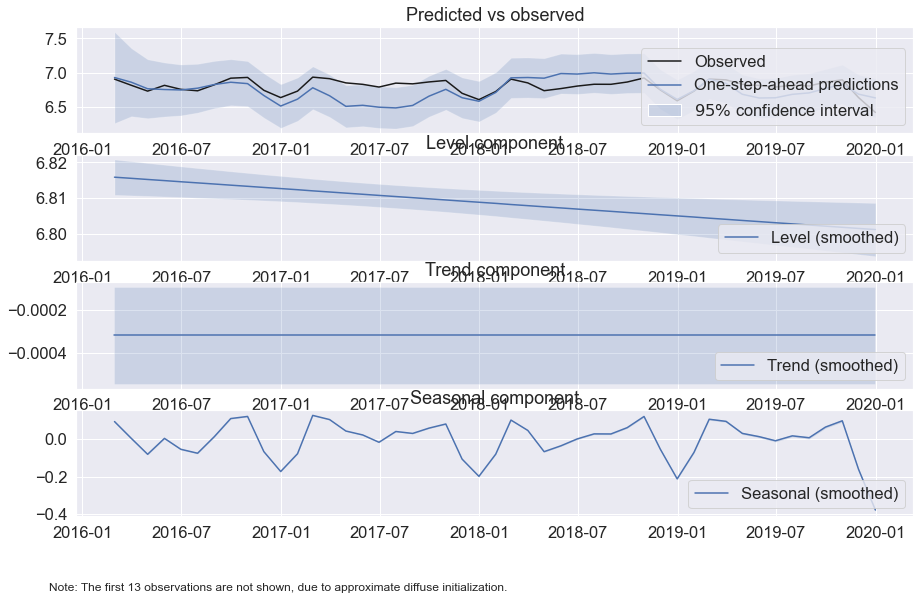

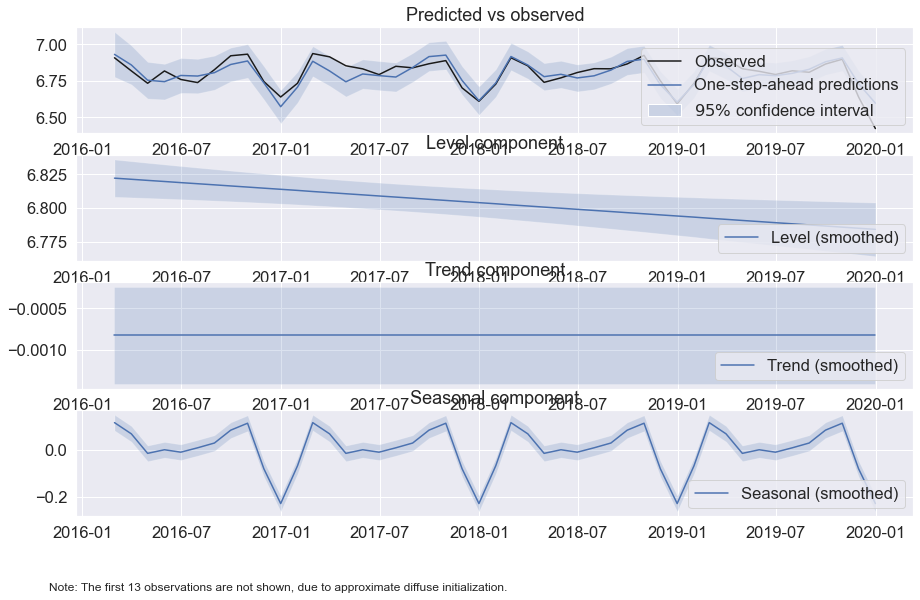

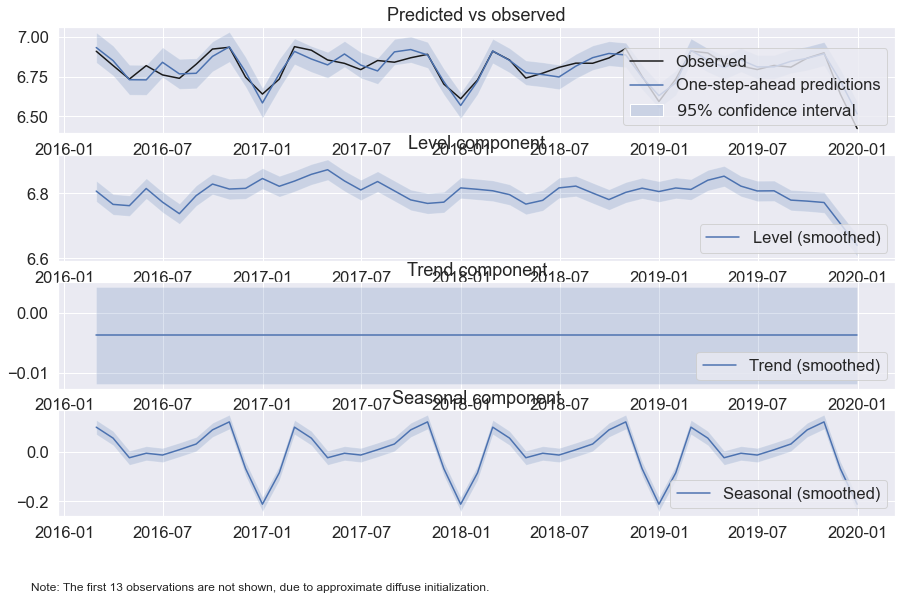

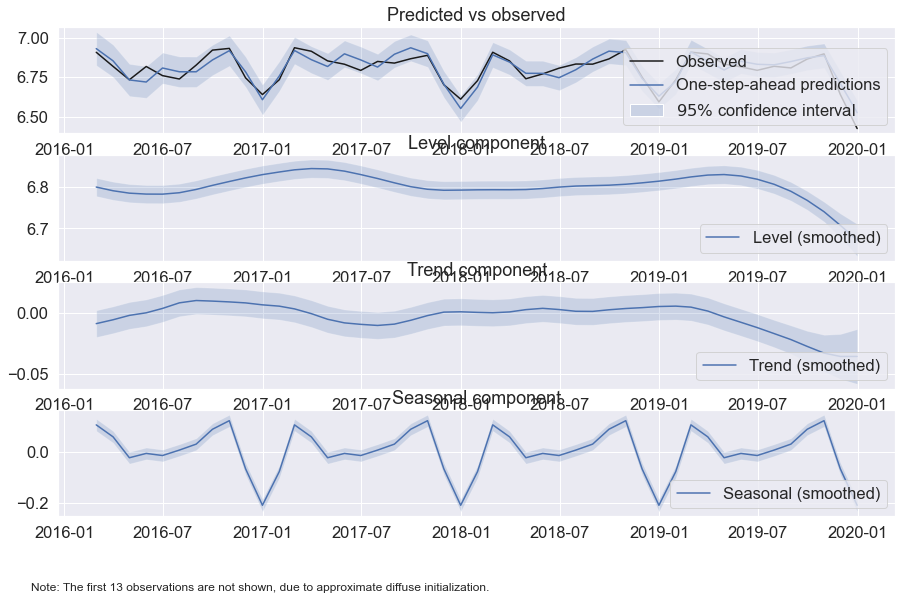

In [46]:
def load_df_from_datasets(location_prefix, number):
    target_file = "{}_{}.csv".format(location_prefix, number)
    df = pd.read_csv(target_file)
    df = df.rename(columns={'Unnamed: 0':'time'})
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.tz_localize(None)
    df['minute'] = df.time.dt.minute + 60 * df.time.dt.hour
    df = df.set_index('time')
    df['year'] = pd.DatetimeIndex(df.index).year
    df['month'] = pd.DatetimeIndex(df.index).month
    df['day'] = pd.DatetimeIndex(df.index).day
    df['hour'] = pd.DatetimeIndex(df.index).hour
    df['minute_of_hour'] = pd.DatetimeIndex(df.index).minute
    df['minute_of_day'] = df['minute_of_hour'] + df['hour'] * 60
    
    
    return df

def preprocess(df, window):
    df_night = ma_da.remove_night_time_data(df)
    df_night_clip = ma_da.remove_clipping_with_flexible_window(df_night, verbose=False)

    df_post = df_night_clip.resample(window).mean()
    df_post["LogPower"] = np.log(df_post["Power"])
    
    return df_post

# with open(r'basic_results.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(["data_set", "calc_rate", "true_rate", "error"])
levels = ["fixed slope", "dtrend", "lldtrend", "smooth trend"]
for level  in levels:
    for i in range(1):
        basic_df = load_df_from_datasets("../data/raw/synthetic_soil/Synthetic_Soil", i)    

        basic_df_post_weekly = preprocess(basic_df, "M")
        unrestricted_model_monthly = {
            'level': level, 'seasonal':12, 
        }
        print(basic_df_post_weekly.size)
        output_mod = sm.tsa.UnobservedComponents(basic_df_post_weekly["LogPower"],  **unrestricted_model_monthly)
        output_res = output_mod.fit(method="powell", disp=False)
        calculated_rate_old = np.exp(np.mean(output_res.trend["smoothed"][13:])*12)-1
        print(np.mean(output_res.trend["smoothed"][13:]*12))
        print(calculated_rate_old)
        print(basic_df["Degradation_rate_per_yr"][0])
        #writer.writerow([i, calculated_rate_old, basic_df["Degradation_rate_per_yr"][0], (calculated_rate_old - basic_df["Degradation_rate_per_yr"][0])])
        print(output_res.summary())
        output_res.plot_components(legend_loc='lower right', figsize=(15, 9))

In [ ]:
levels = ["fixed slope", "dtrend", "lldtrend", "smooth trend"]
for level  in levels:
    for i in range(1):
        basic_df = load_df_from_datasets("../data/raw/synthetic_basic/Synthetic_Basic", i)    

        basic_df_post_weekly = preprocess(basic_df, "M")
        unrestricted_model_monthly = {
            'level': level, 'seasonal':12, 
        }
        print(basic_df_post_weekly.size)
        output_mod = sm.tsa.UnobservedComponents(basic_df_post_weekly["LogPower"],  **unrestricted_model_monthly)
        output_res = output_mod.fit(method="powell", disp=False)
        calculated_rate_old = np.exp(np.mean(output_res.trend["smoothed"][13:])*12)-1
        print(np.mean(output_res.trend["smoothed"][13:]*12))
        print(calculated_rate_old)
        print(basic_df["Degradation_rate_per_yr"][0])
        #writer.writerow([i, calculated_rate_old, basic_df["Degradation_rate_per_yr"][0], (calculated_rate_old - basic_df["Degradation_rate_per_yr"][0])])
        print(output_res.summary())
        output_res.plot_components(legend_loc='lower right', figsize=(15, 9))

840
-0.009581165093043966
-0.009535411970109542
-0.00948
                            Unobserved Components Results                            
Dep. Variable:                      LogPower   No. Observations:                   60
Model:                           fixed slope   Log Likelihood                 173.045
                   + stochastic seasonal(12)   AIC                           -344.090
Date:                       Wed, 19 Aug 2020   BIC                           -342.240
Time:                               16:34:16   HQIC                          -343.394
Sample:                           01-31-2015                                         
                                - 12-31-2019                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
s

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


840
-0.009447950033841421
-0.00940345838246981
-0.00948
                            Unobserved Components Results                            
Dep. Variable:                      LogPower   No. Observations:                   60
Model:                   deterministic trend   Log Likelihood                 225.969
                   + stochastic seasonal(12)   AIC                           -447.937
Date:                       Wed, 19 Aug 2020   BIC                           -444.237
Time:                               16:34:52   HQIC                          -446.545
Sample:                           01-31-2015                                         
                                - 12-31-2019                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------


/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


840
-0.00920802737103877
-0.009165763309364583
-0.00948
                               Unobserved Components Results                                
Dep. Variable:                             LogPower   No. Observations:                   60
Model:             local linear deterministic trend   Log Likelihood                 241.354
                          + stochastic seasonal(12)   AIC                           -476.707
Date:                              Wed, 19 Aug 2020   BIC                           -471.157
Time:                                      16:35:31   HQIC                          -474.619
Sample:                                  01-31-2015                                         
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------

/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
/Users/darrenvalentine/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/statsmodels/tsa/statespace/structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


In [40]:
with open(r'basic_results.csv','a') as f:
    writer = csv.writer(f)
    
    for i in range(5, 50):
        basic_df = load_df_from_datasets("../data/raw/synthetic_basic/Synthetic_Basic", i)    
        basic_df_post_weekly = preprocess(basic_df, "5D")
        unrestricted_model_monthly = {
            'level': "dtrend", 'seasonal':73,
        }
        output_mod = sm.tsa.UnobservedComponents(basic_df_post_weekly["LogPower"], **unrestricted_model_monthly)
        output_res = output_mod.fit(method="powell", disp=False)
        calculated_rate_old = np.exp(np.mean(output_res.trend["smoothed"][13:])*73)-1
        writer.writerow([i, calculated_rate_old, basic_df["Degradation_rate_per_yr"][0], (calculated_rate_old - basic_df["Degradation_rate_per_yr"][0])])


In [62]:
def load_df_from_datasets(location_prefix, number):
    target_file = "{}_{}.csv".format(location_prefix, number)
    df = pd.read_csv(target_file)
    df = df.rename(columns={'Unnamed: 0':'time'})
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.tz_localize(None)
    df['minute'] = df.time.dt.minute + 60 * df.time.dt.hour
    df = df.set_index('time')
    df['year'] = pd.DatetimeIndex(df.index).year
    df['month'] = pd.DatetimeIndex(df.index).month
    df['day'] = pd.DatetimeIndex(df.index).day
    df['hour'] = pd.DatetimeIndex(df.index).hour
    df['minute_of_hour'] = pd.DatetimeIndex(df.index).minute
    df['minute_of_day'] = df['minute_of_hour'] + df['hour'] * 60
    
    
    return df

def preprocess(df, window):
    df_night = ma_da.remove_night_time_data(df)
    df_night_clip = ma_da.remove_clipping_with_flexible_window(df_night, verbose=False)

    df_post = df_night_clip.resample(window).mean()
    df_post["LogPower"] = np.log(df_post["Power"])
    
    return df_post

with open(r'soil_results_2D.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(["data_set", "calc_rate", "true_rate", "error"])

    for i in range(2):
        basic_df = load_df_from_datasets("../data/raw/synthetic_soil/Synthetic_Soil", i)    
        basic_df_post_weekly = preprocess(basic_df, "5D")
        unrestricted_model_monthly = {
            'level': "fixed slope", 'seasonal':75,
        }
        output_mod = sm.tsa.UnobservedComponents(basic_df_post_weekly["LogPower"], **unrestricted_model_monthly)
        output_res = output_mod.fit(method="powell", disp=False)
        calculated_rate_old = np.exp(np.mean(output_res.trend["smoothed"][13:])*365)-1
        writer.writerow([i, calculated_rate_old, basic_df["Degradation_rate_per_yr"][0], (calculated_rate_old - basic_df["Degradation_rate_per_yr"][0])])


KeyboardInterrupt: 

In [61]:
365.25/2

182.625

In [58]:
df = pd.read_csv("basic_results.csv")
100*np.sqrt((df["error"]**2).mean())
#df.plot(x="calc_rate", y="true_rate", marker='o')
# df["error"].hist()

0.013076736199660313

In [59]:
df = pd.read_csv("soil_results.csv")
100*np.sqrt((df["error"]**2).mean())
# df.plot(x="calc_rate", y="true_rate", kind='scatter')
#df["error"].hist()

1.1092320600617862

<AxesSubplot:xlabel='calc_rate'>

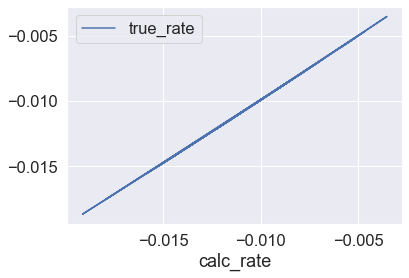

In [48]:
df.plot(x="calc_rate", y="true_rate")


In [89]:
0.0007870193072022635*12

0.009444231686427162

In [126]:
stats.linregress(x/12,(1+-0.00948)**(x/12))

LinregressResult(slope=-0.009353225256640616, intercept=0.9998929031742512, rvalue=-0.9999884228113473, pvalue=5.985692320775456e-106, stderr=6.7092729551910065e-06)

In [9]:
-0.009933342152112326**2

-9.867128631093152e-05

In [13]:
print(100*-0.021413342152112325)
print(-0.011479999999999999)

-2.1413342152112325
-0.011479999999999999


In [6]:
output_res.plot_components(legend_loc='lower right', figsize=(15, 9))

TypeError: plot_components() got an unexpected keyword argument 'egend_loc'